Number of GPU = 1
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 1, 64)          0         
____________________________________________________

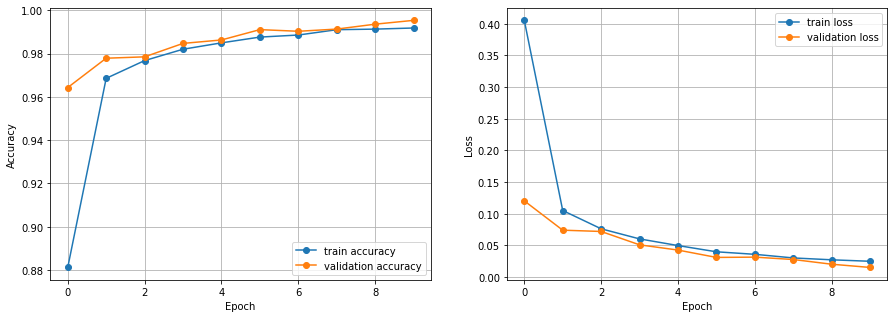

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0154 - accuracy: 0.9953

Test Accuracy: 0.9953333139419556

Test Loss: 0.015366031788289547


5

In [10]:

# Sowvik Sarker
# 17-33228-1
# CVPR
# Sec: A


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models

import os
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)



(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

#Normalize Data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()


model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
#model.compile( optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'] )
#model.compile( optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'] )

h = model.fit(train_images, train_labels, validation_data=(train_images, train_labels), epochs=10, batch_size=200)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


test_loss, test_acc = model.evaluate(train_images, train_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

predictions = model.predict(train_images)
predictions[0]
np.argmax(predictions[0])



# -> Test Accuracy 99%

# -> I have used different Loss Function/Optimizer, but accracy is nearly same.

# -> The test is less accurate if I don't use normalizer. The loss is nearly 2%, which means, the model's
# prediction is bad. and Accuracy is nearly 97%.
# But with normalization, the test accuracy is higher, 99% and test loss is nearly 0%. so the model is predicting better.


